# Tutorial 2 - linear regression

The data used in this example was published by the Oak Ridge National Laboratory, Building Technologies Research and Integration Center (USA). It contains end use breakdowns of energy use and various indoor environmental conditions collected at the Campbell Creek Research House #3, at a 15 minute time stamp. The data availability ranges from 10/1/2013 to 9/30/2014.

## Introduction to linear regression

Linear regression models are usually the first example shown in most statistical learning lectures. They are a popular introduction to statistical modelling because of their simplicity, while their structure is flexible and applicable to quite a large range of physical systems.

<img src='images/linear_regression_1.png' width=200 />

The goal of linear regression is to determine a linear relationship between a dependent variable $y$ and one or several explanatory variables $x=(x_1,...,x_p)$.

$$y = \theta_0 + \theta_1 x_1 + ... + \theta_p x_p + \varepsilon$$

where $\varepsilon \sim \mathcal{n}(0,\sigma)$ is a zero-centered normally distributed residual. The parameters $\theta$ are estimated by fitting the data $y$ with the linear model.

## Example

The original data file which was used in the first tutorial has been preprocessed into a new one with daily averaged values: `ornldailydata.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

# Importing data into a dataframe with the pandas library
df = pd.read_csv('data/ornldailydata.csv')

df.head()

,date,RECORD,main_Tot,Batt_Volt_Avg,PV_generated_Tot,HP_in_Tot,HP_out_Tot,Fantech_Tot,solar_HW_pump_Tot,HW_Tot,...,gar_ext_lts_Tot,garage_tmp_Avg,jacuzzi_plg_Tot,dishHot_tmp_Avg,washHot_tmp_Avg,L1_heater_Tot,Tstat1_tmp_Avg,Tstat2_tmp_Avg,TV_plg_Tot,ti
0,2013-10-01,814.0,401.326316,12.801684,116.793684,12.434211,49.613684,9.928411,0.0,36.057895,...,3.880737,21.165789,28.923474,38.083333,36.388889,41.901158,24.227485,NaN,5.007537,23.659544
1,2013-10-02,909.5,410.817708,12.796042,100.570312,14.986979,61.371354,9.808750,0.0,35.083333,...,3.828594,21.513657,29.033646,38.166667,36.277778,40.890156,24.269097,NaN,4.933740,23.710503
2,2013-10-03,1005.5,395.817708,12.798021,107.322917,15.963542,66.444271,9.781583,0.0,35.187500,...,3.831146,21.907060,29.033438,38.222222,36.694444,40.799271,24.241493,NaN,4.940271,23.727240
3,2013-10-04,1101.5,353.265625,12.791458,123.767708,16.106771,70.785938,9.787115,0.0,31.140625,...,3.836302,21.924248,28.982813,NaN,NaN,40.737396,24.176389,NaN,4.947344,23.662135
4,2013-10-05,1197.5,363.984375,12.794063,129.954688,17.343750,79.419792,9.784729,0.0,29.666667,...,3.840365,21.974306,30.879167,NaN,NaN,40.832604,24.273843,NaN,4.941771,23.791337


We wish to assess the efficiency of our PV panels. Since we expect their productivity to increase with the solar irradiance, a good first step is to plot these two variables together:

<AxesSubplot:xlabel='SlrW1_Avg', ylabel='PV_generated_Tot'>

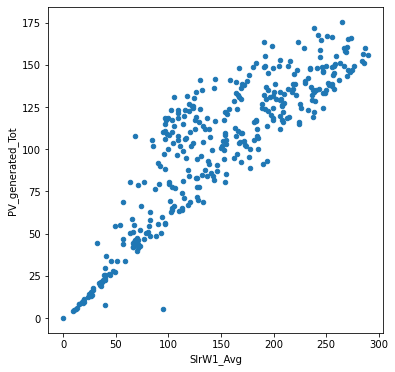

In [2]:
df.plot.scatter(x = 'SlrW1_Avg',
                y = 'PV_generated_Tot',
                figsize = [6, 6])

#sns.regplot(data = df, x = 'SlrW1_Avg', y = 'PV_generated_Tot')

According to this graph, the relationship between these variables is close to linear.

$$\mathrm{PVgeneratedTot} \approx \theta \times \mathrm{SlrW1Avg}$$

The following block fits a linear regression model with a single input variable, and displays some results:

                                 OLS Regression Results                                
Dep. Variable:       PV_generated_Tot   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              7990.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                   3.14e-250
Time:                        10:35:51   Log-Likelihood:                         -1664.8
No. Observations:                 366   AIC:                                      3332.
Df Residuals:                     365   BIC:                                      3336.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

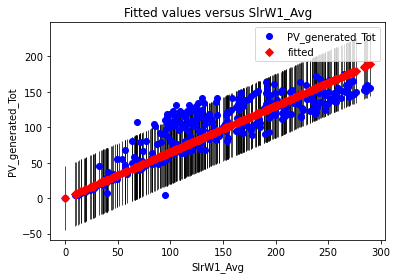

In [3]:
# Definition of the output data y1 and the input data x1
y1 = df['PV_generated_Tot']
x1 = df['SlrW1_Avg']
#x1 = np.column_stack((data_['T_in'] - data_['T_ext'], np.ones(len(data_))))

# Fitting the linear regressor and showing results
res1 = sm.OLS(y1, x1).fit()
print(res1.summary())

# I added a plot of the results
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res1, 0, ax=ax)
plt.show()

The table shows a lot of values indicating how well our model fits data.

* R-squared is the coefficient of determination, which indicates how well the explanatory variables predict the output variable. A value close to 1 means that all its variation is explained.
* The "coef" value in front of the variable `SlrW1_Avg` is the $\theta$ parameter. Its standard error is also shown.
* Other variables are diagnostics of the model and will not be covered in detail here.

Let's try another model with two input variables

                                 OLS Regression Results                                
Dep. Variable:       PV_generated_Tot   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4913.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                   4.35e-264
Time:                        10:35:51   Log-Likelihood:                         -1628.0
No. Observations:                 366   AIC:                                      3260.
Df Residuals:                     364   BIC:                                      3268.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

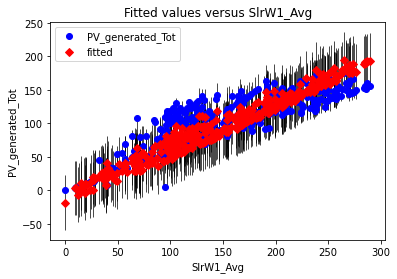

In [4]:
# Definition of the output data y2 and the two inputs in x2
y2 = df['PV_generated_Tot']
x2 = df[['SlrW1_Avg', 'Outside_Tmp_Avg']]
# Model fitting
res2 = sm.OLS(y2, x2).fit()
print(res2.summary())

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res2, 0, ax=ax)
plt.show()

This shows that the outdoor temperature tends to have a negative impact on the PV productivity.

## Exercises

1. Is there a way to improve the prediction of the PV generated power by adding variables?

2. Can you find if variables in the dataset are related to the efficiency of the solar water heater?

<AxesSubplot:xlabel='Outside_Tmp_Avg', ylabel='HW_Tot'>

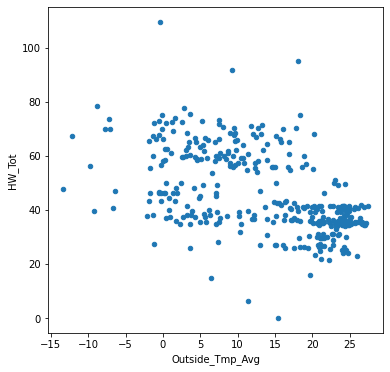

In [5]:
df.plot.scatter(x = 'Outside_Tmp_Avg',
                y = 'HW_Tot',
                figsize = [6, 6])

3. Find the value of the heat loss coefficient $H$ of the house, which relates the heating demand $\Phi_h$ to the indoor-outdoor temperature difference in winter:

$$\Phi_h = H \times (T_i-T_e)$$

hint: you have to filter only winter days so that the relationship is linear.

<AxesSubplot:xlabel='tite', ylabel='HP_out_Tot'>

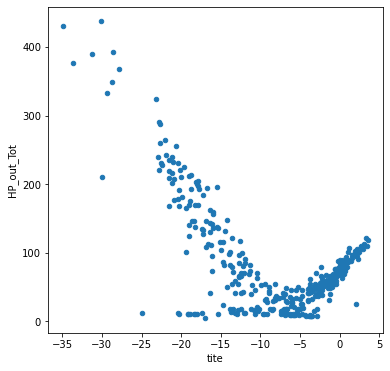

In [6]:
df['tite'] = df['Outside_Tmp_Avg'] - df['ti']
df.plot.scatter(x = 'tite',
                y = 'HP_out_Tot',
                figsize = [6, 6])